In [110]:
#Installing libraries and packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,  confusion_matrix
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [111]:
# Load the restaurant reviews dataset
reviews_path = 'Restaurant reviews.csv'
reviews_df = pd.read_csv(reviews_path)
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [112]:
# Convert ratings into binary sentiment labels- Assuming ratings 4 and above are positive (1), and below 4 are negative (0)
reviews_df['Sentiment'] = reviews_df['Rating'].apply(lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 4 else 0)

# Droping the rows with missing values in 'Review' or 'Sentiment' to clean the data
cleaned_df = reviews_df.dropna(subset=['Review', 'Sentiment'])

<Axes: xlabel='Sentiment', ylabel='count'>

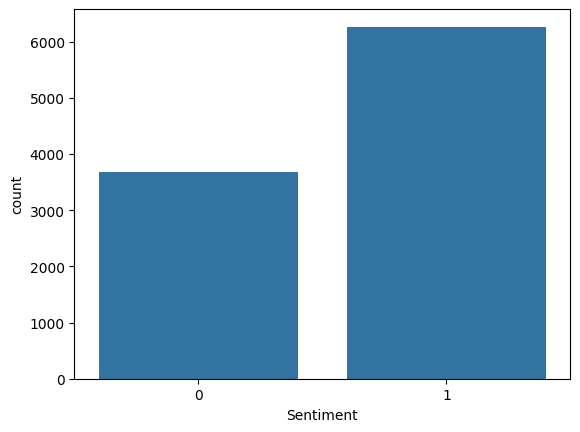

In [113]:
#plot for positive(1) and negative(0) sentiment labels
sns.countplot(x='Sentiment', data=cleaned_df)


In [114]:
# Text preprocessing: convert to lowercase and remove punctuation
cleaned_df['Review'] = cleaned_df['Review'].apply(lambda x: x.lower())
cleaned_df['Review'] = cleaned_df['Review'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))


<ipython-input-114-9f812ea1c933>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Review'] = cleaned_df['Review'].apply(lambda x: x.lower())
<ipython-input-114-9f812ea1c933>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Review'] = cleaned_df['Review'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))


In [115]:
#Describing cleaned data
cleaned_df.describe()

,Pictures,7514,Sentiment
count,9955.000000,1.0,9955.000000
mean,0.751984,2447.0,0.629633
std,2.575691,NaN,0.482927
min,0.000000,2447.0,0.000000
25%,0.000000,2447.0,0.000000
50%,0.000000,2447.0,1.000000
75%,0.000000,2447.0,1.000000
max,64.000000,2447.0,1.000000


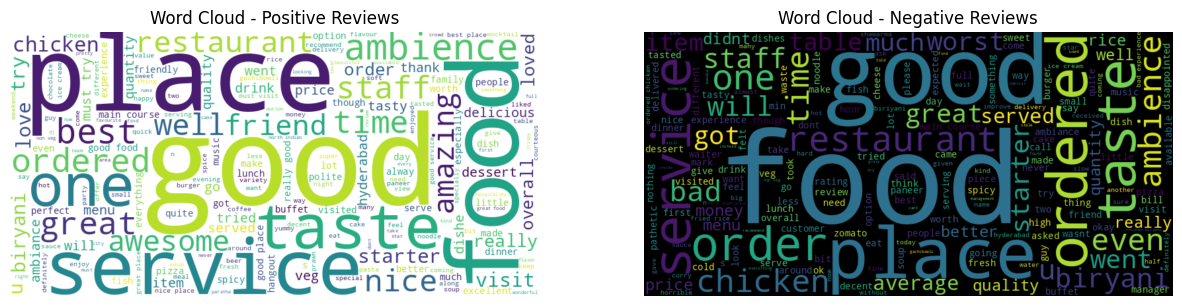

In [116]:
# WordCloud for positive reviews
positive_reviews = cleaned_df[cleaned_df['Sentiment'] == 1]['Review']
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# WordCloud for negative reviews
negative_reviews = cleaned_df[cleaned_df['Sentiment'] == 0]['Review']
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot the WordClouds
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')

plt.show()

In [117]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_df['Review'], cleaned_df['Sentiment'], test_size=0.3, random_state=50)

In [118]:
# Vectorizing the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("Words:",vectorizer.vocabulary_)
print("Encoded Document is:")
print(X_test_vec.toarray())


Words: {'probably': 10489, 'best': 1773, 'way': 14611, 'introduce': 6986, 'friends': 5499, 'arena': 1137, '19': 119, '299': 222, '399': 278, '20': 146, '30': 240, 'time': 13684, 'delivery': 3883, 'good': 5866, 'food': 5292, 'service': 11907, 'biryanis': 1913, 'excellent': 4783, 'chicken': 2710, 'curries': 3595, 'breads': 2134, 'make': 8118, 'alrightgood': 810, 'place': 10107, 'hangout': 6204, 'used': 14219, 'really': 10934, 'love': 7972, 'problem': 10490, 'zomato': 15036, 'deliveryman': 3887, 'assigned': 1232, 'deliver': 3874, 'didnt': 4024, 'order': 9426, 'paid': 9623, 'online': 9373, 'took': 13797, 'turned': 13980, 'phone': 10011, 'answer': 1004, 'update': 14177, 'followup': 5288, 'got': 5972, 'foodjust': 5338, 'money': 8658, 'refunded': 11027, 'thats': 13526, 'need': 8981, 'eat': 4478, 'wait': 14513, 'like': 7810, 'hellbut': 6337, 'nothingthis': 9159, 'frustrating': 5552, 'dont': 4270, 'know': 7483, 'ruining': 11473, 'reputation': 11156, 'half': 6176, 'boiled': 2022, 'rice': 11310, 

In [119]:
# Training the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [120]:
# Predicting the test set results for Naive bayes
y_pred = nb_classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy for Naive Bayes: {accuracy}")
print("Classification Report for Naive Bayes:")
print(report)

Accuracy for Naive Bayes: 0.8590559089387345
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1122
           1       0.86      0.93      0.89      1865

    accuracy                           0.86      2987
   macro avg       0.86      0.84      0.84      2987
weighted avg       0.86      0.86      0.86      2987



In [121]:
matrix = pd.DataFrame(confusion_matrix(y_pred, y_test ))
matrix

,0,1
0,831,130
1,291,1735


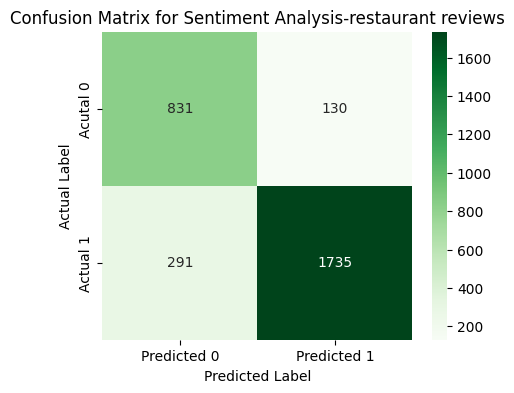

In [132]:
plt.figure(figsize=(5, 4))
sns.heatmap(matrix , annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Acutal 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Sentiment Analysis-restaurant reviews")
plt.show()

In [123]:
from sklearn.neighbors import KNeighborsClassifier

# Splitting the dataset into training and testing sets for kNN
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(cleaned_df['Review'], cleaned_df['Sentiment'], test_size=0.3, random_state=50)


In [124]:
# Vectorizing the text data for kNN
vectorizer_knn = CountVectorizer(stop_words='english')
X_train_vec_knn = vectorizer_knn.fit_transform(X_train_knn)
X_test_vec_knn = vectorizer_knn.transform(X_test_knn)

In [125]:
# Building and training the k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_vec_knn, y_train_knn)


KNeighborsClassifier(n_neighbors=3)

In [126]:
# Predicting the test set results and evaluating the kNN classifier's performance
y_pred_knn = knn_classifier.predict(X_test_vec_knn)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
report_knn = classification_report(y_test_knn, y_pred_knn)

print("Results for k-Nearest Neighbors:")
print(f"Accuracy for KNN: {accuracy_knn}")
print("Classification Report for KNN:")
print(report_knn)

Results for k-Nearest Neighbors:
Accuracy for KNN: 0.7248074991630399
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.67      0.53      0.59      1122
           1       0.75      0.84      0.79      1865

    accuracy                           0.72      2987
   macro avg       0.71      0.69      0.69      2987
weighted avg       0.72      0.72      0.72      2987



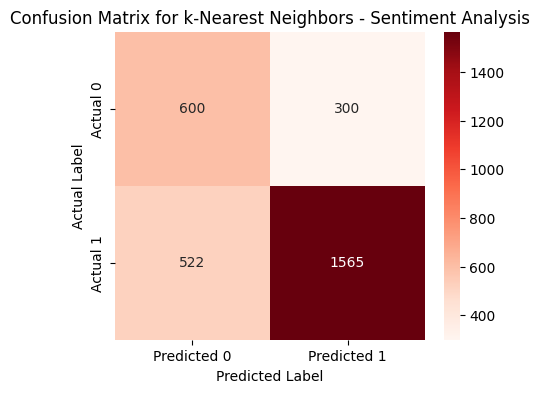

In [133]:

# Confusion matrix for kNN
matrix_knn = pd.DataFrame(confusion_matrix(y_pred_knn, y_test_knn))

# Plotting the confusion matrix for kNN
plt.figure(figsize=(5, 4))
sns.heatmap(matrix_knn, annot=True, fmt="d", cmap="Reds", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for k-Nearest Neighbors - Sentiment Analysis")
plt.show()


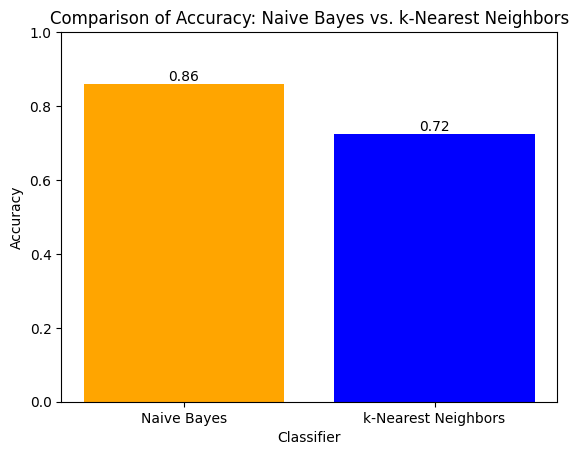

In [128]:
accuracy_values = [accuracy, accuracy_knn]
classifier_labels = ['Naive Bayes', 'k-Nearest Neighbors']
bars=plt.bar(classifier_labels, accuracy_values, color=['orange', 'blue'])
plt.ylim([0, 1])
plt.bar_label(bars, fmt='%.2f', label_type='edge')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy: Naive Bayes vs. k-Nearest Neighbors')
plt.show()

In [129]:
# Testing my own restaurant review in my best trained Naive Bayes
test_text = "This restaurant exceeded my expectations. The food was delicious, and the service was excellent."

test_text = test_text.lower()
test_text = ''.join([char for char in test_text if char not in string.punctuation])

# Vectorize the test text - used in training process
test_text_vec = vectorizer.transform([test_text])

# Predict
predicted_sentiment = nb_classifier.predict(test_text_vec)

# Print the predicted sentiment
if predicted_sentiment[0] == 1:
    print("Positive Sentiment")
else:
    print("Negative Sentiment")

Positive Sentiment
